## W1-pOEx workflow


Activating silent BGCs is a highly sought-after endeavor, and our goal was to develop a method for overexpressing regulators.


 This approach has proven effective in activating silent BGCs and enhancing the yields of natural products in streptomyces23–25. To achieve this, we sought a rapid and standardized workflow for overexpressing regulators and devised a plasmid system called pOEX-PkasO (Figure 2A). This system is based on the integrative plasmid pRM4,  described by Menges et. al 200726, but incorporates one of the strongest known promoters engineered in Streptomyces namely PkasO27 along with the canonical RBS sequence “GGAGG”28. The system was experimentally verified and the results can be found in the section “Example usage of workflow 1”. 



In [1]:
import sys
import os

# Ensure the src directory is in the Python path
# Assuming your notebooks are in a subdirectory of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Importing necessary libraries
from Bio.Restriction import StuI
from datetime import datetime


# Importing from custom modules
from streptocad.wet_lab.gel_simulation import simulate_gel_electrophoresis
from streptocad.primers.primer_analysis import analyze_primers_and_hairpins
from streptocad.cloning.plasmid_processing import assemble_and_process_plasmids
from streptocad.cloning.pcr_simulation import perform_pcr_on_sequences
from streptocad.sequence_loading.sequence_loading import load_and_process_plasmid, load_and_process_genome_sequences
from streptocad.utils import polymerase_dict, generate_project_directory_structure
from streptocad.primers.primer_generation import generate_primer_dataframe, create_idt_order_dataframe


# Inputs


In [2]:
# Inputs
# 1 files to incorporate into the pOEX-PKasO (genbank, fasta)
# data/data_for_tf_activation_project/GOE_regulators/GOE_regulators.gb
path_to_file = '../../data/data_for_tf_activation_project/GOE_regulators/GOE_regulators.gb'
clean_seq = load_and_process_genome_sequences(path_to_file)

# 2 Add plasmid 
path_to_plasmid = '../../data/data_for_tf_activation_project/plasmids/p270_prm4e-pkaso-rbs.gb'
clean_plasmid = load_and_process_plasmid(path_to_plasmid)

# 3 Choose overlapping sequences for our plasmid we can use the following
up_homology = "GGCGAGCAACGGAGGTACGGACAGG".upper()
dw_homology = "CGCAAGCCGCCACTCGAACGGAAGG".upper()

#### Advanced settings ####
# 4 Choose polymerase and target melting temperature
chosen_polymerase = 'Phusion High-Fidelity DNA Polymerase (GC Buffer)'
melting_temperature = 60
primer_concentration = 0.4 
primer_number_increment = 1

In [3]:
clean_seq

[Dseqrecord(-813),
 Dseqrecord(-2859),
 Dseqrecord(-636),
 Dseqrecord(-2319),
 Dseqrecord(-822),
 Dseqrecord(-1353),
 Dseqrecord(-654),
 Dseqrecord(-813),
 Dseqrecord(-609),
 Dseqrecord(-648),
 Dseqrecord(-786),
 Dseqrecord(-888),
 Dseqrecord(-3420),
 Dseqrecord(-1830),
 Dseqrecord(-1221),
 Dseqrecord(-2421),
 Dseqrecord(-2916),
 Dseqrecord(-2304)]

# Outputs

In [4]:
# 1 Table with overview of primers and their analysis
primer_df = generate_primer_dataframe(clean_seq, 
                                      melting_temperature, 
                                      polymerase_dict[chosen_polymerase], 
                                      primer_concentration,
                                      up_homology, dw_homology, 
                                      primer_number_increment)
primer_df

,template,f_primer_anneal(5-3),r_primer_anneal(5-3),f_tm,r_tm,ta,f_primer_sequences(5-3),r_primer_sequences(5-3),f_primer_name,r_primer_name
0,LLPMBPKK_00292,GTGACCCAGCCCGCC,TCATTCGGCGGCGGAGC,62,65,65,GGCGAGCAACGGAGGTACGGACAGGGTGACCCAGCCCGCC,CGCAAGCCGCCACTCGAACGGAAGGTCATTCGGCGGCGGAGC,primer_1,primer_2
1,LLPMBPKK_00328,ATGATGAAGGGGATGCC,TCAGCCGGAGTCGGT,55,58,59,GGCGAGCAACGGAGGTACGGACAGGATGATGAAGGGGATGCC,CGCAAGCCGCCACTCGAACGGAAGGTCAGCCGGAGTCGGT,primer_3,primer_4
2,LLPMBPKK_00586,GTGACCGACACCCCC,TCAGCGGCGGATGAGG,58,61,61,GGCGAGCAACGGAGGTACGGACAGGGTGACCGACACCCCC,CGCAAGCCGCCACTCGAACGGAAGGTCAGCGGCGGATGAGG,primer_5,primer_6
3,LLPMBPKK_01488,ATGGGCCGTGTGAGC,TCATCGGTTCCCCTCTTCT,58,59,62,GGCGAGCAACGGAGGTACGGACAGGATGGGCCGTGTGAGC,CGCAAGCCGCCACTCGAACGGAAGGTCATCGGTTCCCCTCTTCT,primer_7,primer_8
4,LLPMBPKK_02197,GTGGCTCTGTTCCACATG,TCATGCAAGGGTCGG,57,54,58,GGCGAGCAACGGAGGTACGGACAGGGTGGCTCTGTTCCACATG,CGCAAGCCGCCACTCGAACGGAAGGTCATGCAAGGGTCGG,primer_9,primer_10
5,LLPMBPKK_02209,GTGGAAGTTATGGAACGG,TCAGGACCTGAGCCG,54,56,58,GGCGAGCAACGGAGGTACGGACAGGGTGGAAGTTATGGAACGG,CGCAAGCCGCCACTCGAACGGAAGGTCAGGACCTGAGCCG,primer_11,primer_12
6,LLPMBPKK_02563,GTGCGTGTTGTCCTAGC,TCAGCGGTCCCGGTC,57,60,60,GGCGAGCAACGGAGGTACGGACAGGGTGCGTGTTGTCCTAGC,CGCAAGCCGCCACTCGAACGGAAGGTCAGCGGTCCCGGTC,primer_13,primer_14
7,LLPMBPKK_02633,ATGGCGCATCTGGACA,CTACAGCGGGGCCAG,57,58,61,GGCGAGCAACGGAGGTACGGACAGGATGGCGCATCTGGACA,CGCAAGCCGCCACTCGAACGGAAGGCTACAGCGGGGCCAG,primer_15,primer_16
8,LLPMBPKK_02635,GTGATTCGGATCCTGCTC,CTAGACCAGCCAGCC,56,54,58,GGCGAGCAACGGAGGTACGGACAGGGTGATTCGGATCCTGCTC,CGCAAGCCGCCACTCGAACGGAAGGCTAGACCAGCCAGCC,primer_17,primer_18
9,LLPMBPKK_02637,ATGACCGACACCGACA,TCAGGAGCGGGCGAG,56,60,60,GGCGAGCAACGGAGGTACGGACAGGATGACCGACACCGACA,CGCAAGCCGCCACTCGAACGGAAGGTCAGGAGCGGGCGAG,primer_19,primer_20


## Simulating the PCRs

In [5]:
list_of_amplicons = perform_pcr_on_sequences(primer_df, 
                                             clean_seq)

LLPMBPKK_00292_amplicon , Length: 863
                         5GTGACCCAGCCCGCC...GCTCCGCCGCCGAATGA3
                                            |||||||||||||||||
                                           3CGAGGCGGCGGCTTACTGGAAGGCAAGCTCACCGCCGAACGC5
5GGCGAGCAACGGAGGTACGGACAGGGTGACCCAGCCCGCC3
                          |||||||||||||||
                         3CACTGGGTCGGGCGG...CGAGGCGGCGGCTTACT5

LLPMBPKK_00328_amplicon , Length: 2909
                         5ATGATGAAGGGGATGCC...ACCGACTCCGGCTGA3
                                              |||||||||||||||
                                             3TGGCTGAGGCCGACTGGAAGGCAAGCTCACCGCCGAACGC5
5GGCGAGCAACGGAGGTACGGACAGGATGATGAAGGGGATGCC3
                          |||||||||||||||||
                         3TACTACTTCCCCTACGG...TGGCTGAGGCCGACT5

LLPMBPKK_00586_amplicon , Length: 686
                         5GTGACCGACACCCCC...CCTCATCCGCCGCTGA3
                                            ||||||||||||||||
                                  

In [6]:
list_of_amplicons[0].figure()

                         5GTGACCCAGCCCGCC...GCTCCGCCGCCGAATGA3
                                            |||||||||||||||||
                                           3CGAGGCGGCGGCTTACTGGAAGGCAAGCTCACCGCCGAACGC5
5GGCGAGCAACGGAGGTACGGACAGGGTGACCCAGCCCGCC3
                          |||||||||||||||
                         3CACTGGGTCGGGCGG...CGAGGCGGCGGCTTACT5

In [7]:
# 2 Ready made IDT format
idt_df = create_idt_order_dataframe(primer_df, concentration="25nm", purification="STD")
idt_df

,Name,Sequence,Concentration,Purification
0,primer_1,GGCGAGCAACGGAGGTACGGACAGGGTGACCCAGCCCGCC,25nm,STD
1,primer_3,GGCGAGCAACGGAGGTACGGACAGGATGATGAAGGGGATGCC,25nm,STD
2,primer_5,GGCGAGCAACGGAGGTACGGACAGGGTGACCGACACCCCC,25nm,STD
3,primer_7,GGCGAGCAACGGAGGTACGGACAGGATGGGCCGTGTGAGC,25nm,STD
4,primer_9,GGCGAGCAACGGAGGTACGGACAGGGTGGCTCTGTTCCACATG,25nm,STD
5,primer_11,GGCGAGCAACGGAGGTACGGACAGGGTGGAAGTTATGGAACGG,25nm,STD
6,primer_13,GGCGAGCAACGGAGGTACGGACAGGGTGCGTGTTGTCCTAGC,25nm,STD
7,primer_15,GGCGAGCAACGGAGGTACGGACAGGATGGCGCATCTGGACA,25nm,STD
8,primer_17,GGCGAGCAACGGAGGTACGGACAGGGTGATTCGGATCCTGCTC,25nm,STD
9,primer_19,GGCGAGCAACGGAGGTACGGACAGGATGACCGACACCGACA,25nm,STD


In [8]:
# 3 analyzed primers
analyzed_primers = analyze_primers_and_hairpins(primer_df)
analyzed_primers

,annealing_temperature,primer_pair,homodimer_forward_tm,homodimer_forward_deltaG (kcal/mol),homodimer_reverse_tm,homodimer_reverse_deltaG (kcal/mol),heterodimer_tm,heterodimer_deltaG (kcal/mol),hairpin_forward_structure_found,hairpin_forward_tm,hairpin_forward_deltaG (kcal/mol),hairpin_reverse_structure_found,hairpin_reverse_tm,hairpin_reverse_deltaG (kcal/mol)
0,65,primer_1 & primer_2,34.021522,-3.131492,38.230381,3.985863,11.043296,-3.361806,False,0.000000,0.000000,True,70.286301,-1.120565
1,59,primer_3 & primer_4,-2.732299,-1.875404,23.137503,5.684721,16.034890,-2.235144,False,0.000000,0.000000,True,53.213047,0.854665
2,61,primer_5 & primer_6,32.056377,-1.196758,33.436149,1.024674,16.034890,-1.852396,True,70.962822,-1.262316,True,60.984684,0.003016
3,62,primer_7 & primer_8,22.307266,-2.124594,17.052331,1.510040,16.034890,-1.661022,True,57.408070,0.598721,False,0.000000,0.000000
4,58,primer_9 & primer_10,24.824883,1.652343,17.052331,0.441742,13.835954,-3.942077,True,52.023525,0.619384,True,52.280697,0.316342
5,58,primer_11 & primer_12,-2.732299,-2.003432,38.098806,-5.491597,21.331367,1.510353,False,0.000000,0.000000,True,59.875969,-0.156600
6,60,primer_13 & primer_14,26.064400,3.309062,22.021431,3.624117,16.034890,-2.043770,True,55.815989,0.396823,True,52.280697,0.426965
7,61,primer_15 & primer_16,10.831736,-3.321236,33.846298,4.297286,16.034890,-1.852396,True,54.477246,0.232936,False,0.000000,0.000000
8,58,primer_17 & primer_18,18.243693,3.251055,27.286390,0.660532,16.034890,-2.426517,False,0.000000,0.000000,True,67.457477,-0.894081
9,60,primer_19 & primer_20,31.282594,2.800268,28.760616,0.721062,18.616442,-0.884771,True,68.678788,-0.870852,True,55.424254,0.960898


LLPMBPKK_00292_amplicon
LLPMBPKK_00328_amplicon
LLPMBPKK_00586_amplicon
LLPMBPKK_01488_amplicon
LLPMBPKK_02197_amplicon
LLPMBPKK_02209_amplicon
LLPMBPKK_02563_amplicon
LLPMBPKK_02633_amplicon
LLPMBPKK_02635_amplicon
LLPMBPKK_02637_amplicon
LLPMBPKK_02662_amplicon
LLPMBPKK_05992_amplicon
LLPMBPKK_06337_amplicon
LLPMBPKK_06422_amplicon
LLPMBPKK_06907_amplicon
LLPMBPKK_07531_amplicon
LLPMBPKK_07744_amplicon
LLPMBPKK_07949_amplicon


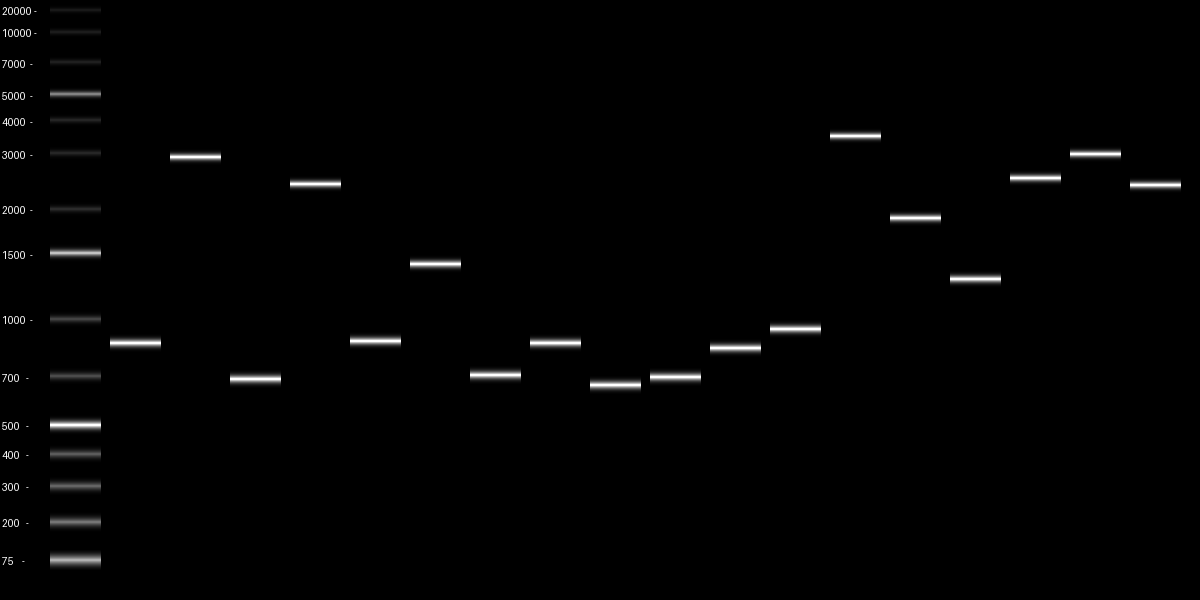

In [9]:
# 5 Gel simulation of all the amplicons + table overview?
simulate_gel_electrophoresis(list_of_amplicons)

In [10]:
# 3 Assembled plasmid genbank files
assembled_plasmids, assembly_results = assemble_and_process_plasmids(clean_plasmid, list_of_amplicons, 
                              enzyme=StuI, 
                              save_plasmids=False, 
                              save_path="../../data/plasmids/pOEX_overexpression_plasmids")

../../data/plasmids/pOEX_overexpression_plasmids/p1_LLPMBPKK_00292.gb

../../data/plasmids/pOEX_overexpression_plasmids/p2_LLPMBPKK_00328.gb

../../data/plasmids/pOEX_overexpression_plasmids/p3_LLPMBPKK_00586.gb

../../data/plasmids/pOEX_overexpression_plasmids/p4_LLPMBPKK_01488.gb

../../data/plasmids/pOEX_overexpression_plasmids/p5_LLPMBPKK_02197.gb

../../data/plasmids/pOEX_overexpression_plasmids/p6_LLPMBPKK_02209.gb

../../data/plasmids/pOEX_overexpression_plasmids/p7_LLPMBPKK_02563.gb

../../data/plasmids/pOEX_overexpression_plasmids/p8_LLPMBPKK_02633.gb

../../data/plasmids/pOEX_overexpression_plasmids/p9_LLPMBPKK_02635.gb

../../data/plasmids/pOEX_overexpression_plasmids/p10_LLPMBPKK_02637.gb

../../data/plasmids/pOEX_overexpression_plasmids/p11_LLPMBPKK_02662.gb

../../data/plasmids/pOEX_overexpression_plasmids/p12_LLPMBPKK_05992.gb

../../data/plasmids/pOEX_overexpression_plasmids/p13_LLPMBPKK_06337.gb

../../data/plasmids/pOEX_overexpression_plasmids/p14_LLPMBPKK_06422.gb

../../data/plasmids/pOEX_overexpression_plasmids/p15_LLPMBPKK_06907.gb

../../data/plasmids/pOEX_overexpression_plasmids/p16_LLPMBPKK_07531.gb

../../data/plasmids/pOEX_overexpression_plasmids/p17_LLPMBPKK_07744.gb

../../data/plasmids/pOEX_overexpression_plasmids/p18_LLPMBPKK_07949.gb

In [11]:
assembly_results

[Contig(o6043),
 Contig(o8089),
 Contig(o5866),
 Contig(o7549),
 Contig(o6052),
 Contig(o6583),
 Contig(o5884),
 Contig(o6043),
 Contig(o5839),
 Contig(o5878),
 Contig(o6016),
 Contig(o6118),
 Contig(o8650),
 Contig(o7060),
 Contig(o6451),
 Contig(o7651),
 Contig(o8146),
 Contig(o7534)]

## Folder with all the generated I/O

In [13]:


input_files = [
    {"name": "input_sequences.gb", "content": clean_seq},
    {"name": "input_plasmid.gb", "content": clean_plasmid}
]

output_files = [
    {"name": "pOEX-PKasO.gb", "content": assembled_plasmids}, # LIST OF Dseqrecords
    {"name": "primer_df.csv", "content": primer_df},
    {"name": "full_idt.csv", "content": idt_df},
    {"name": "primers_analyzed.csv", "content": analyzed_primers},
]

input_values = {
    "polymerase_settings": {
        "chosen_polymerase": chosen_polymerase,
        "melting_temperature": melting_temperature,
        "primer_concentration": primer_concentration,
        "primer_number_increment": primer_number_increment,
    },

    "overlapping_sequences": {
        "up_homology": str(up_homology),
        "dw_homology": str(dw_homology)
    }
}

# Paths to Markdown files
markdown_file_paths = [
    "../../protocols/conjugation_protcol.md",
]

# Data and time
timestamp = datetime.utcnow().isoformat()

generate_project_directory_structure(
    project_name=f"pOEX-PKasO_workflow_{timestamp}",
    input_files=input_files,
    output_files=output_files,
    input_values=input_values,
    markdown_file_paths=markdown_file_paths

)

Project structure for 'pOEX-PKasO_workflow_2024-06-28T09:13:27.078634' created successfully.
